<a href="https://colab.research.google.com/github/Andrer25/PRUEBA-DE-CONOCIMIENTOS-DATOS-NO-ESTRUCTURADOS-I/blob/main/Prueba_Eric_Acosta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desarrollo

##Importar librerías

In [1]:
#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

##Importar CSV

In [2]:
#Se suben como archivos temporales para evitar cargarlos a la web y que la información quede pública
test_precios = pd.read_csv("/content/test_precios_vivienda.csv")
train_precios = pd.read_csv("/content/train_precios_vivienda.csv")

<ipython-input-2-cc47bd5916ef>:3: DtypeWarning: Columns (67,109,110,160,168,169,170,171,178,180) have mixed types. Specify dtype option on import or set low_memory=False.
  train_precios = pd.read_csv("/content/train_precios_vivienda.csv")


In [3]:
test_precios.head()

,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,7811,11166,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,...,0,0,0,No,0,332032000,257.43810000000002,1289754.7,-75.601388,6.218362
1,1562,2243,43014.446921,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,MAGDALENA,...,0,0,0,No,0,"332418000,00",2518857,"1319717,63",0.000000,0.000000
2,353,500,42989.400743,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,MAGDALENA,...,44800000,0,0,0,0,72000000,2.516554E+18,"286105,52",0.000000,0.000000
3,9021,12884,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,TOLIMA,...,0,348.23,90539800,No,0,448995800,258.65210000000002,1736935.05,-74.643383,4.203572
4,2788,4019,43048.690875,Originación,Actualización de garantías,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,CESAR,...,0,0,0,Si,0,"214638600,00",2520727,"851494,83",0.000000,0.000000


In [4]:
train_precios.head()

,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,4112,5896,43090.624747,Remate,Remates,GarantÃ­a Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,...,"81968750,00",0,0,0,0,"145318750,00",2522304,"576134,95",0.000000,0.000000
1,7401,10570,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,QUINDÃO,...,0,157,78500000,No,0,713986654,257.23250000000002,2775647.14,-75.661152,4.544027
2,10223,14600,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,...,0,0,0,Si,0,270500000,259.4264,1042684.94,-75.584116,6.277020
3,4170,5967,43091.676139,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,...,0,0,0,No,0,"84840000,00",252245,"336339,67",0.000000,0.000000
4,11073,15814,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,META,...,69306400,0,0,0,0,96346400,259.72770000000003,370951.58,-73.712370,3.565757


##Revisión DataFrames

In [5]:
precios = pd.concat([test_precios, train_precios])

In [6]:
print(precios.shape)
precios.head()

(12857, 222)


,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,7811,11166,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,...,0,0,0,No,0,332032000,257.43810000000002,1289754.7,-75.601388,6.218362
1,1562,2243,43014.446921,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,MAGDALENA,...,0,0,0,No,0,"332418000,00",2518857,"1319717,63",0.000000,0.000000
2,353,500,42989.400743,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,MAGDALENA,...,44800000,0,0,0,0,72000000,2.516554E+18,"286105,52",0.000000,0.000000
3,9021,12884,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,TOLIMA,...,0,348.23,90539800,No,0,448995800,258.65210000000002,1736935.05,-74.643383,4.203572
4,2788,4019,43048.690875,Originación,Actualización de garantías,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,CESAR,...,0,0,0,Si,0,"214638600,00",2520727,"851494,83",0.000000,0.000000


In [7]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12857 entries, 0 to 11570
Columns: 222 entries, Unnamed: 0 to Latitud
dtypes: float64(6), int64(18), object(198)
memory usage: 21.9+ MB


In [8]:
print(precios["valor_total_avaluo"].unique())

['332032000' '332418000,00' '72000000' ... '572610000' '183290000,00'
 '154500000']


##Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:
1.   Datos faltantes en algunas celdas
2.   Columnas irrelevantes (que no responden al problema que queremos resolver)
3.   Registros (filas) repetidos
4.   Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos.
5.   Errores tipográficos en el caso de las variables categóricas.

###-Columnas Irrelevantes

In [9]:
#Se genera una lista con todas los nombres de las columnas
col_precios = list(precios.columns.values)

#Se genera lista con todas las columnas con datos categóricas
col_categ_precios = []
for col in col_precios:
    if precios[col].dtype == "object":
        col_categ_precios.append(col)

#Conteo de los niveles en las diferentes columnas categóricas
for colg in col_categ_precios:
  print(f'Columna {colg}: {precios[colg].nunique()} subniveles')

Columna objeto: 4 subniveles
Columna motivo: 22 subniveles
Columna proposito: 8 subniveles
Columna tipo_avaluo: 3 subniveles
Columna tipo_credito: 4 subniveles
Columna tipo_subsidio: 5 subniveles
Columna departamento_inmueble: 53 subniveles
Columna municipio_inmueble: 444 subniveles
Columna barrio: 6103 subniveles
Columna sector: 12 subniveles
Columna direccion_inmueble_informe: 12826 subniveles
Columna alcantarillado_en_el_sector: 6 subniveles
Columna acueducto_en_el_sector: 4 subniveles
Columna gas_en_el_sector: 3 subniveles
Columna energia_en_el_sector: 2 subniveles
Columna telefono_en_el_sector: 2 subniveles
Columna vias_pavimentadas: 2 subniveles
Columna sardineles_en_las_vias: 2 subniveles
Columna andenes_en_las_vias: 2 subniveles
Columna estrato: 11 subniveles
Columna barrio_legal: 6 subniveles
Columna topografia_sector: 6 subniveles
Columna condiciones_salubridad: 8 subniveles
Columna transporte: 6 subniveles
Columna demanda_interes: 9 subniveles
Columna paradero: 6 subniveles


In [10]:
#Se identifica visualmente que las columnas importantes tienen más de 226
columnas_precios = []

for colg in col_categ_precios:
    if precios[colg].nunique() < 227:
        columnas_precios.append(colg)

print(columnas_precios)

['objeto', 'motivo', 'proposito', 'tipo_avaluo', 'tipo_credito', 'tipo_subsidio', 'departamento_inmueble', 'sector', 'alcantarillado_en_el_sector', 'acueducto_en_el_sector', 'gas_en_el_sector', 'energia_en_el_sector', 'telefono_en_el_sector', 'vias_pavimentadas', 'sardineles_en_las_vias', 'andenes_en_las_vias', 'estrato', 'barrio_legal', 'topografia_sector', 'condiciones_salubridad', 'transporte', 'demanda_interes', 'paradero', 'alumbrado', 'arborizacion', 'alamedas', 'ciclo_rutas', 'nivel_equipamiento_comercial', 'alcantarillado_en_el_predio', 'acueducto_en_el_predio', 'gas_en_el_predio', 'energia_en_el_predio', 'telefono_en_el_predio', 'tipo_inmueble', 'uso_actual', 'clase_inmueble', 'ocupante', 'sometido_a_propiedad_horizontal', 'altura_permitida', 'observaciones_altura_permitida', 'aislamiento_posterior', 'observaciones_aislamiento_posterior', 'aislamiento_lateral', 'observaciones_aislamiento_lateral', 'antejardin', 'observaciones_antejardin', 'indice_ocupacion', 'observaciones_ind

In [11]:
#Se elimiinan las columnas innecesarias
for i in columnas_precios:
    precios = precios.drop(columns=[i])

In [12]:
#Se revisa las columnas númericas
precios.describe()

,Unnamed: 0,id,fecha_aprobación,bano_social,bano_servicio,cocina,estudio,balcon,terraza,patio_interior,...,oficina,bodega,numero_garaje_5,matricula_garaje_5,matricula_inmobiliaria_deposito_3,matricula_inmobiliaria_deposito_4,numero_deposito_5,matricula_inmobiliaria_deposito_5,Longitud,Latitud
count,12857.00000,12857.000000,5.344000e+03,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,12857.000000,...,12857.000000,12857.000000,12857.000000,12856.0,12855.0,12856.000000,12857.0,12857.0,12857.000000,12855.000000
mean,6428.00000,9182.685852,4.335527e+04,1.021778,0.136579,1.065879,0.245469,0.510695,0.211947,0.382204,...,0.010967,0.018745,0.002411,0.0,0.0,0.000078,0.0,0.0,-50.544378,3.973058
std,3711.64054,5290.674433,2.179096e+04,0.753539,0.377717,0.423449,0.440563,0.663919,0.465473,0.587005,...,0.201784,0.147179,0.273396,0.0,0.0,0.008820,0.0,0.0,35.136926,3.328417
min,0.00000,1.000000,4.297933e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,-81.729359,-4.219505
25%,3214.00000,4621.000000,4.301044e+04,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,-75.562921,0.000000
50%,6428.00000,9182.000000,4.304671e+04,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,-74.101304,4.631946
75%,9642.00000,13770.000000,4.308845e+04,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,6.198128
max,12856.00000,18331.000000,1.636029e+06,14.000000,11.000000,13.000000,3.000000,11.000000,9.000000,11.000000,...,9.000000,3.000000,31.000000,0.0,0.0,1.000000,0.0,0.0,73.640261,13.355871


In [13]:
#Se revisa la columna Unnamed y id
print(precios["Unnamed: 0"].nunique()) #Se interpreta que la columna es el # de fila
print(precios["id"].nunique())

12857
12857


In [14]:
#Se terminarn de eliminan las columnas innecesarias
precios = precios.drop(columns=["Latitud"])
precios = precios.drop(columns=["Longitud"])
precios = precios.drop(columns=["matricula_inmobiliaria_deposito_5"])
precios = precios.drop(columns=["numero_deposito_5"])
precios = precios.drop(columns=["matricula_inmobiliaria_deposito_4"])
precios = precios.drop(columns=["matricula_inmobiliaria_deposito_3"])
precios = precios.drop(columns=["matricula_garaje_5"])
precios = precios.drop(columns=["numero_garaje_5"])
precios = precios.drop(columns=["fecha_aprobación"])

In [15]:
print(precios.shape)
precios.info()

(12857, 57)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12857 entries, 0 to 11570
Data columns (total 57 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Unnamed: 0                            12857 non-null  int64 
 1   id                                    12857 non-null  int64 
 2   municipio_inmueble                    12857 non-null  object
 3   barrio                                12851 non-null  object
 4   direccion_inmueble_informe            12857 non-null  object
 5   descripcion_general_sector            12857 non-null  object
 6   perspectivas_de_valorizacion          12857 non-null  object
 7   actualidad_edificadora                12857 non-null  object
 8   comportamiento_oferta_demanda         12857 non-null  object
 9   descripcion_tipo_inmueble             12620 non-null  object
 10  descripcion_uso_inmueble              12612 non-null  object
 11  descripcion_clas

###-Se realiza DF con las columnas identificadas

In [16]:
print(precios["descripcion_clase_inmueble"].unique())

['0' '2 plantas arquitectonicas' 'Ubicado en conjunto cerrado' ...
 'EN  CONJUNTO' 'Multifamiliar, sin ascensor.'
 'alcoba ppal con baÃ±o privado']


In [17]:
#Se revisa con el código anterior las columnas restante para veriificar si son utiles
precios = precios.drop(columns=["concepto_del_metodo_5"])
precios = precios.drop(columns=["concepto_del_metodo_8"])
precios = precios.drop(columns=["matricula_inmobiliaria_deposito_1"])
precios = precios.drop(columns=["numero_deposito_1"])
precios = precios.drop(columns=["matricula_garaje_2"])
precios = precios.drop(columns=["numero_garaje_2"])
precios = precios.drop(columns=["matricula_garaje_1"])
precios = precios.drop(columns=["numero_garaje_1"])
precios = precios.drop(columns=["observaciones_generales_inmueble"])
precios = precios.drop(columns=["area_actividad"])
precios = precios.drop(columns=["area_valorada"])
precios = precios.drop(columns=["observaciones_indice_construccion"])

In [18]:
#El DF ya tiene los datos que se requieren
print(precios.shape)
precios.info()

(12857, 45)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12857 entries, 0 to 11570
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Unnamed: 0                            12857 non-null  int64 
 1   id                                    12857 non-null  int64 
 2   municipio_inmueble                    12857 non-null  object
 3   barrio                                12851 non-null  object
 4   direccion_inmueble_informe            12857 non-null  object
 5   descripcion_general_sector            12857 non-null  object
 6   perspectivas_de_valorizacion          12857 non-null  object
 7   actualidad_edificadora                12857 non-null  object
 8   comportamiento_oferta_demanda         12857 non-null  object
 9   descripcion_tipo_inmueble             12620 non-null  object
 10  descripcion_uso_inmueble              12612 non-null  object
 11  descripcion_clas

In [19]:
#Organizar datos
precios.sort_values(by="Unnamed: 0", inplace=True)
precios.head(10)

,Unnamed: 0,id,municipio_inmueble,barrio,direccion_inmueble_informe,descripcion_general_sector,perspectivas_de_valorizacion,actualidad_edificadora,comportamiento_oferta_demanda,descripcion_tipo_inmueble,...,area_terreno,valor_area_terreno,area_construccion,valor_area_construccion,area_otros,valor_area_otros,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr
819,0,1,SOACHA,BUENOS AIRES,"""KR 7 C # 2 A - 30 SUR CS 2""","""Vivienda multifamiliar-zonas verdes-arborizac...","""Teniendo en cuenta el estado del inmueble y s...","""Es un sector consolidado, al momento de la vi...","""Equilibrada""",0,...,0,0,0,0,0,0,0,"71995500,00",2.516675E+18,"286041,49"
9661,1,3,SINCELEJO,LAS FLORES,"""KR 6 # 6 - 20""","""El sector donde se localiza el inmueble es de...","""Normales, sector consolidado.""","""En la actualidad, se observan que no se están...","""Tanto la oferta como la demanda se consideran...",0,...,154,27720000,92,"49774000,08",48,9600000,0,"87094000,08",251696,"346028,54"
7291,2,4,CALI,FLORA INDUSTRIAL,"""KR 7 # 58 - 05 AP 201""","""Sector consolidado de la ciudad.""","""Positiva, dada la consolidación de uso reside...","""En el sector no se observan proyectos en etap...","""Presenta una oferta media en el sector inmedi...",0,...,0,0,0,0,0,0,0,"76151500,00",251696,"302553,48"
1129,3,5,PASTO,LAS BRISAS,"""KR 18 Este # 21 G Bis - 03 MZ 16 CS 1""","""El Barrio Las Brisas es un sector destinado a...","""El mercado inmobiliario del entorno urbano y ...","""En la actualidad, no se observan en el sector...","""La demanda de inmuebles similares en la zona ...",0,...,36,28800000,"63,6","49290000,0",0,0,0,"78090000,0",251696,"310255,23"
11096,4,6,TULUA,BUENOS AIRES,"""CL 26 D # 8 - 27""","""Sector ubicado en la zona occidental del muni...","""Son buenas por la ubicación del inmueble en u...","""Abundante actividad edificadora""","""La oferta es similar a la demanda.""",0,...,"92,52","32382000,00","77,9","28823000,0",0,0,0,"61205000,00",251696,"243166,47"
10499,5,7,ITAGUI,VIVIENDAS DEL SUR,"""KR 58 # 77 - 41 TR 5 ET 3 APTO 921""","""Inmueble ubicado en zona residencial con buen...","""Aceptables.""","""Alta.""","""Buena demanda.""",0,...,0,0,0,0,0,0,0,1648560000516,251696,"654970,20"
8311,6,8,CALI,EL BOSQUE,"""CL 46 N # 7 N - 135""","""Ubicado al norte del municipio con toda la in...","""Estables, no hay factores internos ni externo...","""Sector consolidado, reparación de vías""","""Balanceado.""",0,...,"258,7","160394000,0","131,37","55109189,52",0,0,0,"215503189,52",251696,"856204,27"
8665,7,10,PUERTO TEJADA,La Esperanza,"""KR 17 # 23 - 76""","""Inmueble bien ubicado en el centro-norte de P...","""Sector con buenas perspectivas de valorización.""","""Por ahora en el sector no se desarrollan proy...","""En el momento no se adelantan construcciones ...",0,...,203,34510000,135,62100000,0,0,0,96610000,251696,"383836,06"
10,8,11,"BOGOTÁ, D. C.",LOS ROSALES,"""KR 5 # 78 - 20 AP 503""","""Se trata de un sector exclusivo de la ciudad ...","""Las perspectivas de valorización se considera...","""La actualidad edificadora en la zona es baja,...","""La oferta y la demanda se consideran medias y...",0,...,0,0,0,0,0,0,0,"1608208000,0",251696,"6389485,73"
10753,9,12,CHAPARRAL,CARMENZA ROCHA,"""CL 8 # 2 - 62""","""Vivienda Medianera de 1 piso. Sector residenc...","""Sector residencial a una cuadra de la Plaza d...","""Sector residencial a media una cuadra de la P...","""En el sector se encuentran pocas ofertas, son...",0,...,100,14000000,100,74000000,0,0,0,88000000,251696,"349628,12"


##Analisis

###Identificar la cantidad de "habitaciones"

In [20]:
col_precios = list(precios.columns.values)

#Se genera lista con todas las columnas con datos categóricas
col_categ = []
for col in col_precios:
    if precios[col].dtype == "int64":
        col_categ.append(col)

col_categ.remove("Unnamed: 0")
col_categ.remove("id")

print(col_categ)

['bano_social', 'bano_servicio', 'cocina', 'estudio', 'balcon', 'terraza', 'patio_interior', 'jardin', 'zona_de_ropas', 'zona_verde_privada', 'local', 'oficina', 'bodega']


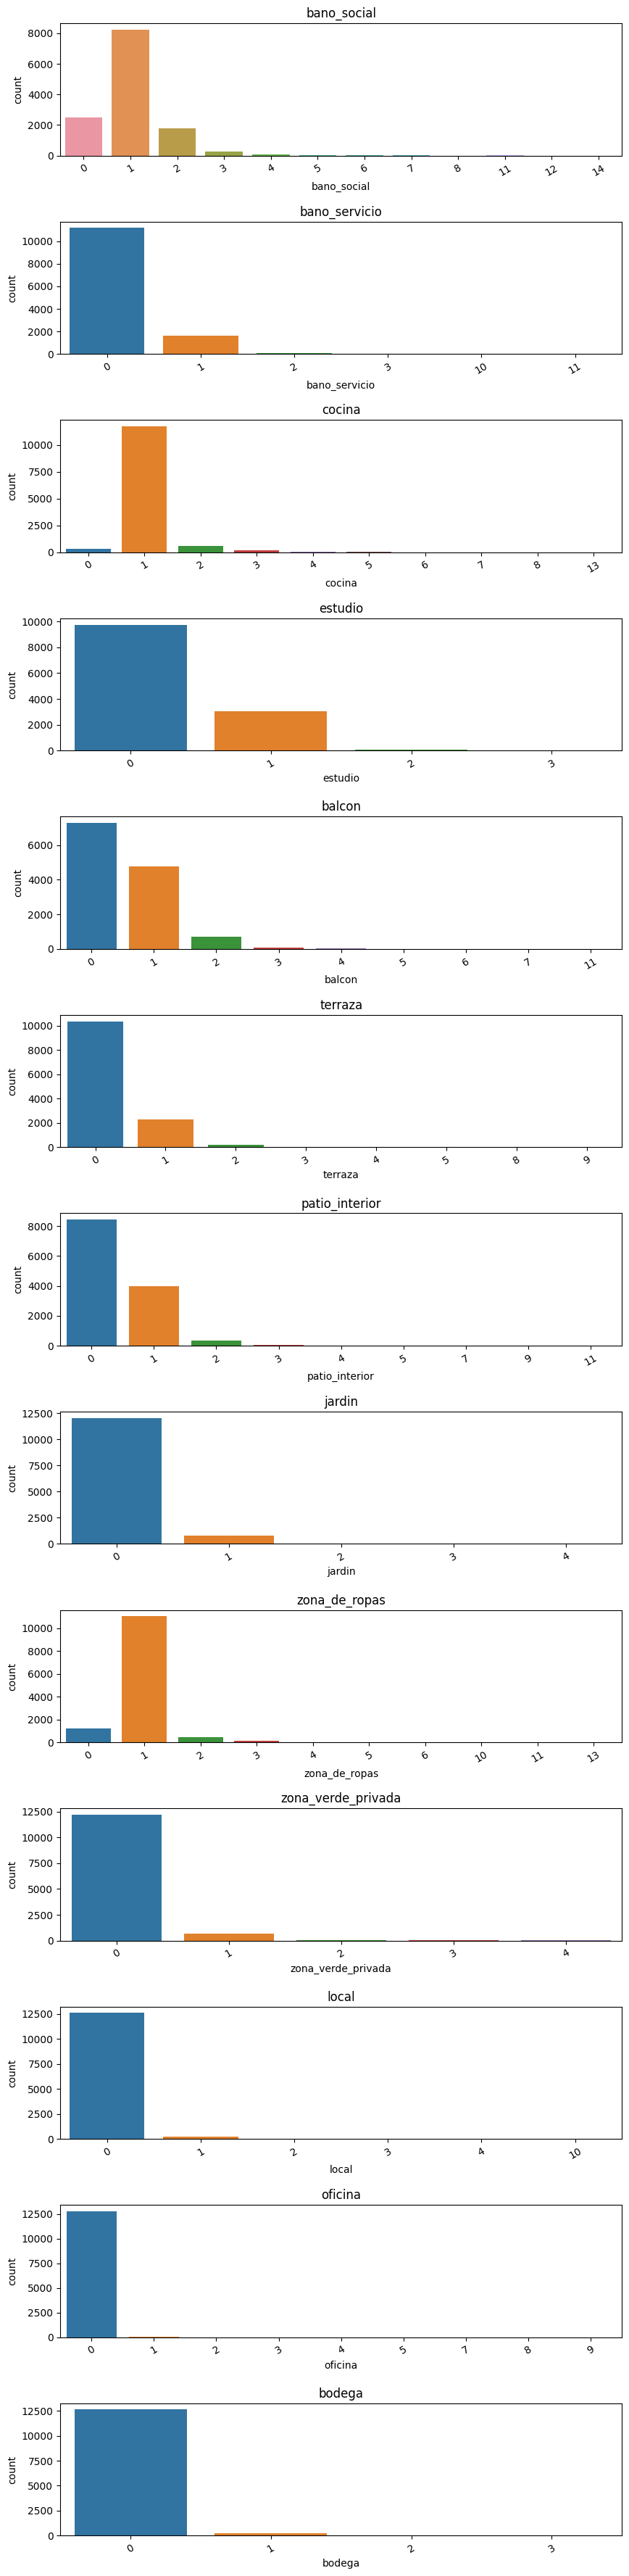

In [21]:
# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_categ), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_categ):
  sns.countplot(x=col, data=precios, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

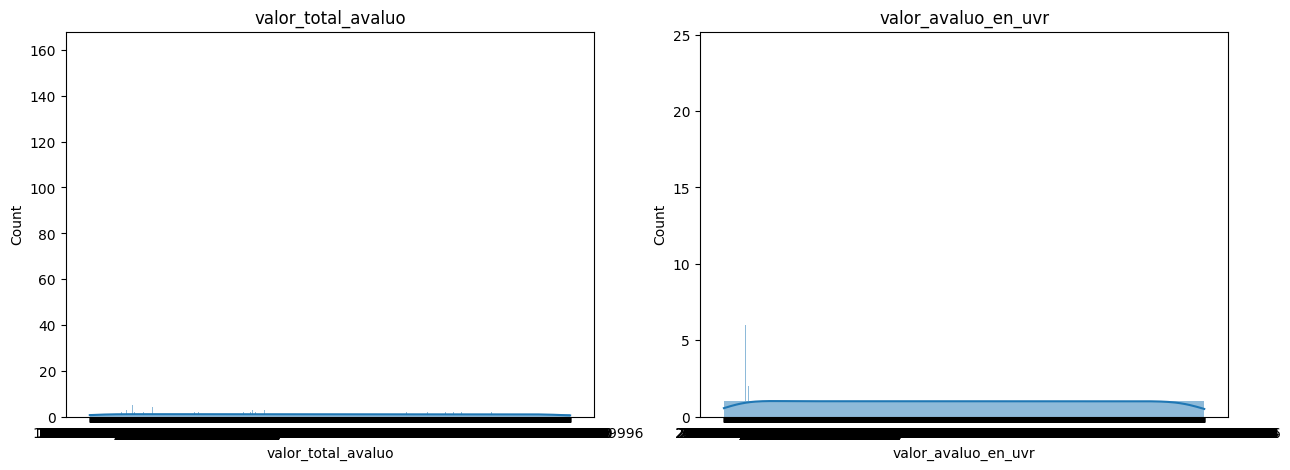

In [22]:
#Verificar distribución de los precios
col_num = ['valor_total_avaluo', 'valor_avaluo_en_uvr']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'valor_total_avaluo':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=precios, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)